In [1]:
#Kerakli kutubxonalar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Datasetni yuklab olamiz

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv')
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
273,1,71,78,50,45,33.2,0.422,21,0
256,3,111,56,39,0,30.1,0.557,30,0
666,4,145,82,18,0,32.5,0.235,70,1
609,1,111,62,13,182,24.0,0.138,23,0
316,3,99,80,11,64,19.3,0.284,30,0


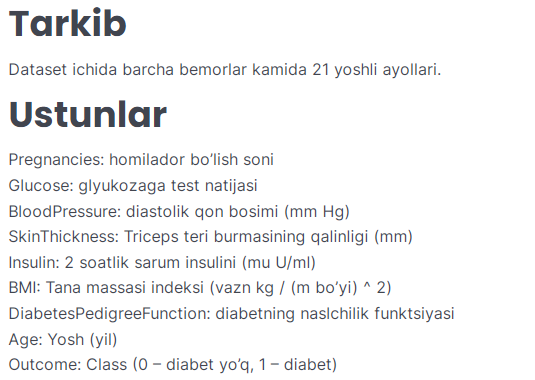

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.shape

(768, 9)

In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Diabet yo'qlar soni ->  500 ta**

**Diabet borlar soni -> 268 ta** ekan orasida farq katta bo'lganligi natijaga ta'sir qiladi

In [7]:
while df.shape[0]> 2*268:
  a = df.sample(1)
  if a['Outcome'].item() == 0:
    df.drop(a.index, inplace=True)

df.shape

(536, 9)

In [8]:
#Ma'lumotlarni muvozanatlashtirib oldik
df['Outcome'].value_counts()

1    268
0    268
Name: Outcome, dtype: int64

Kasallar va kasal bo'lmaganlar bitta joyga yig'ilib qolmaganligini tekshirib olamiz

In [9]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
464,10,115,98,0,0,24.0,1.022,34,0
354,3,90,78,0,0,42.7,0.559,21,0
174,2,75,64,24,55,29.7,0.370,33,0
165,6,104,74,18,156,29.9,0.722,41,1
649,0,107,60,25,0,26.4,0.133,23,0


In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [11]:
corr_mat = df.corr().abs()
corr_mat.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.099515,0.150493,0.055406,0.053323,0.001750,0.038496,0.526747,0.204341
Glucose,0.099515,1.000000,0.142388,0.077897,0.312830,0.233795,0.162569,0.253915,0.461719
BloodPressure,0.150493,0.142388,1.000000,0.202623,0.092405,0.265756,0.058849,0.276192,0.047280
SkinThickness,0.055406,0.077897,0.202623,1.000000,0.458599,0.375051,0.225790,0.080725,0.097617
Insulin,0.053323,0.312830,0.092405,0.458599,1.000000,0.196443,0.202909,0.008495,0.128333
BMI,0.001750,0.233795,0.265756,0.375051,0.196443,1.000000,0.147677,0.034787,0.330546
DiabetesPedigreeFunction,0.038496,0.162569,0.058849,0.225790,0.202909,0.147677,1.000000,0.013244,0.196111
Age,0.526747,0.253915,0.276192,0.080725,0.008495,0.034787,0.013244,1.000000,0.229657
Outcome,0.204341,0.461719,0.047280,0.097617,0.128333,0.330546,0.196111,0.229657,1.000000


Bog'liqligi kam bo'lgan ustunlarni o'chiramiz

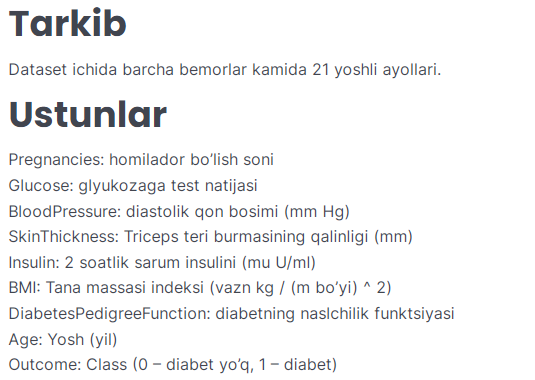

In [12]:
df.drop(['BloodPressure', 'SkinThickness'], axis=1, inplace=True)

corr_mat = df.corr().abs()
corr_mat.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.099515,0.053323,0.001750,0.038496,0.526747,0.204341
Glucose,0.099515,1.000000,0.312830,0.233795,0.162569,0.253915,0.461719
Insulin,0.053323,0.312830,1.000000,0.196443,0.202909,0.008495,0.128333
BMI,0.001750,0.233795,0.196443,1.000000,0.147677,0.034787,0.330546
DiabetesPedigreeFunction,0.038496,0.162569,0.202909,0.147677,1.000000,0.013244,0.196111
Age,0.526747,0.253915,0.008495,0.034787,0.013244,1.000000,0.229657
Outcome,0.204341,0.461719,0.128333,0.330546,0.196111,0.229657,1.000000


In [13]:
df.corrwith(df['Outcome'])

Pregnancies                 0.204341
Glucose                     0.461719
Insulin                     0.128333
BMI                         0.330546
DiabetesPedigreeFunction    0.196111
Age                         0.229657
Outcome                     1.000000
dtype: float64

X va Y ga ajratib olamiz

In [14]:
x = df.drop('Outcome', axis=1)
x.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
2,8,183,0,23.3,0.672,32
4,0,137,168,43.1,2.288,33
5,5,116,0,25.6,0.201,30
6,3,78,88,31.0,0.248,26


In [15]:
y = df['Outcome']
y.head()

0    1
2    1
4    1
5    0
6    1
Name: Outcome, dtype: int64

In [16]:
# Standartlashtirib olamiz
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()

x = standard.fit_transform(x)
x

array([[ 5.33017205e-01,  6.65511581e-01, -6.86996397e-01,
         1.43075041e-01,  4.23177647e-01,  1.33061103e+00],
       [ 1.11252475e+00,  1.72338290e+00, -6.86996397e-01,
        -1.10872953e+00,  5.56746242e-01, -2.01703987e-01],
       [-1.20550544e+00,  3.33037739e-01,  6.78173007e-01,
         1.29765207e+00,  5.35334288e+00, -1.16575375e-01],
       ...,
       [-6.25997894e-01, -1.20335682e-01, -6.86996397e-01,
         5.31985199e-01, -4.28693166e-01, -6.27347047e-01],
       [-9.15751668e-01,  5.63897290e-04, -6.86996397e-01,
        -2.82295445e-01, -4.01979447e-01,  1.07522519e+00],
       [-9.15751668e-01, -9.96857629e-01, -6.86996397e-01,
        -2.45835118e-01, -5.02897941e-01, -9.67861495e-01]])

In [17]:
#Train va Test set ga ajratamiz
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**k-NN** ni chaqirib olamiz

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

**GRID** search yordamida eng yaxshi **k** ni topib olamiz

In [19]:
from sklearn.model_selection import GridSearchCV

grid_param = {'n_neighbors': np.arange(1, 25)}
knn_gridS = GridSearchCV(knn, grid_param, cv=5)
knn_gridS.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [20]:
knn_gridS.cv_results_

{'mean_fit_time': array([0.00186296, 0.00156674, 0.00150504, 0.00147738, 0.00136366,
        0.00148268, 0.00155678, 0.00138907, 0.00156202, 0.00151372,
        0.00137262, 0.00137963, 0.00138845, 0.00163713, 0.00490556,
        0.00192819, 0.00158734, 0.0108212 , 0.00495758, 0.00416408,
        0.00179524, 0.00177202, 0.00177011, 0.00179639]),
 'mean_score_time': array([0.00552421, 0.00661669, 0.00671191, 0.00628061, 0.00639772,
        0.00798054, 0.00721002, 0.0061728 , 0.00680413, 0.00651636,
        0.00601273, 0.00648799, 0.00670691, 0.01618867, 0.01819739,
        0.00895762, 0.00732875, 0.02070217, 0.01695876, 0.01630282,
        0.00892048, 0.01666136, 0.01331229, 0.00851679]),
 'mean_test_score': array([0.66221876, 0.63608515, 0.71249567, 0.6733991 , 0.68831776,
        0.69209069, 0.70328834, 0.68836968, 0.70519211, 0.69214261,
        0.69963655, 0.70901696, 0.70154033, 0.71275528, 0.72577016,
        0.73139495, 0.72949117, 0.73322949, 0.73509865, 0.73515057,
        0.729

In [21]:
knn_gridS.cv_results_['rank_test_score']

array([23, 24, 12, 22, 21, 19, 15, 20, 14, 18, 17, 13, 16, 11, 10,  5,  7,
        3,  2,  1,  6,  4,  8,  8], dtype=int32)

In [22]:
knn_gridS.best_params_

{'n_neighbors': 20}

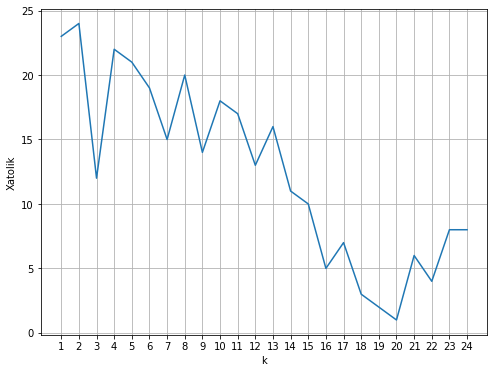

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(grid_param['n_neighbors'], knn_gridS.cv_results_['rank_test_score'])
plt.ylabel('Xatolik')
plt.xlabel('k')
plt.xticks(grid_param['n_neighbors'])
plt.grid()
plt.show()

Eng yaxshi natija **k=23**

In [24]:
knn_grid = KNeighborsClassifier(n_neighbors=23)

knn_grid.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [25]:
y_predict = knn_gridS.predict(x_test)

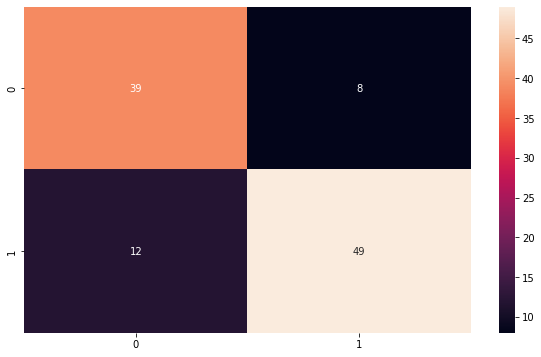

In [26]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))
print(accuracy_score(y_test, y_predict))

0.8596491228070176
0.8032786885245902
0.8305084745762712
0.8148148148148148
